<a href="https://colab.research.google.com/github/SalmaAllam8/football-data-visualization/blob/main/Exercise_Challenge_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 2.2 MB/s eta 0:00:00


In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from mplsoccer import Pitch, VerticalPitch
import matplotlib.pyplot as plt
from pandas import json_normalize
import matplotlib.dates as mdates
from mplsoccer import Pitch
from mplsoccer import Sbopen
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from urllib.request import urlopen
from mplsoccer import PyPizza, add_image, FontManager
import seaborn as sns
import plotly.graph_objects as go


In [ ]:
base_url = 'https://understat.com/match/'


match_ = '22585'

url = base_url + match_

In [ ]:
res = requests.get(url)
soup = BeautifulSoup(res.content)
scripts =  soup.find_all('script')

In [ ]:
strings = scripts[1].string

In [ ]:
strings[0:1000]

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22583724\\x22,\\x22minute\\x22\\x3A\\x2211\\x22,\\x22result\\x22\\x3A\\x22Goal\\x22,\\x22X\\x22\\x3A\\x220.8780000305175781\\x22,\\x22Y\\x22\\x3A\\x220.46\\x22,\\x22xG\\x22\\x3A\\x220.5944961905479431\\x22,\\x22player\\x22\\x3A\\x22Ademola\\x20Lookman\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x225556\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222023\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2222585\\x22,\\x22h_team\\x22\\x3A\\x22Atalanta\\x22,\\x22a_team\\x22\\x3A\\x22Fiorentina\\x22,\\x22h_goals\\x22\\x3A\\x222\\x22,\\x22a_goals\\x22\\x3A\\x223\\x22,\\x22date\\x22\\x3A\\x222024\\x2D06\\x2D02\\x2016\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Charles\\x20De\\x20Ketelaere\\x22,\\x22lastAction\\x22\\x3A\\x22Throughball\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22583726\\x22,\\x22minute\\x22\\x3A\\x2219\\x22,\\x22result\\x

In [ ]:
str_start = strings.index('(')+2
str_end = strings.index(')')
json_data = strings[str_start:str_end]
json_data = json_data.encode('utf8').decode('unicode_escape')


data = json.loads(json_data[0:-1])

In [ ]:
data

{'h': [{'id': '583724',
   'minute': '11',
   'result': 'Goal',
   'X': '0.8780000305175781',
   'Y': '0.46',
   'xG': '0.5944961905479431',
   'player': 'Ademola Lookman',
   'h_a': 'h',
   'player_id': '5556',
   'situation': 'OpenPlay',
   'season': '2023',
   'shotType': 'RightFoot',
   'match_id': '22585',
   'h_team': 'Atalanta',
   'a_team': 'Fiorentina',
   'h_goals': '2',
   'a_goals': '3',
   'date': '2024-06-02 16:00:00',
   'player_assisted': 'Charles De Ketelaere',
   'lastAction': 'Throughball'},
  {'id': '583726',
   'minute': '19',
   'result': 'MissedShots',
   'X': '0.894000015258789',
   'Y': '0.4379999923706055',
   'xG': '0.05402635410428047',
   'player': 'Emil Holm',
   'h_a': 'h',
   'player_id': '10956',
   'situation': 'OpenPlay',
   'season': '2023',
   'shotType': 'Head',
   'match_id': '22585',
   'h_team': 'Atalanta',
   'a_team': 'Fiorentina',
   'h_goals': '2',
   'a_goals': '3',
   'date': '2024-06-02 16:00:00',
   'player_assisted': 'Matteo Ruggeri',
 

In [ ]:


data_home = json_normalize(data['h'])
data_away = json_normalize(data['a'])

In [ ]:
df_home = pd.DataFrame(data_home)
df_away = pd.DataFrame(data_away)

In [ ]:
df_all = pd.concat([df_home, df_away])

In [ ]:
df_home.shape, df_away.shape, df_all.shape

((12, 20), (8, 20), (20, 20))

In [ ]:
print(df_home.dtypes)

# Convert columns to appropriate data types if necessary
df_home['X'] = pd.to_numeric(df_home['X'], errors='coerce')
df_home['Y'] = pd.to_numeric(df_home['Y'], errors='coerce')
df_home['xG'] = pd.to_numeric(df_home['xG'], errors='coerce')

# Verify the conversion
print(df_home.dtypes)

id                 object
minute             object
result             object
X                  object
Y                  object
xG                 object
player             object
h_a                object
player_id          object
situation          object
season             object
shotType           object
match_id           object
h_team             object
a_team             object
h_goals            object
a_goals            object
date               object
player_assisted    object
lastAction         object
dtype: object
id                  object
minute              object
result              object
X                  float64
Y                  float64
xG                 float64
player              object
h_a                 object
player_id           object
situation           object
season              object
shotType            object
match_id            object
h_team              object
a_team              object
h_goals             object
a_goals             object
date   

In [ ]:
print(df_away.dtypes)

df_away['X'] = pd.to_numeric(df_away['X'], errors='coerce')
df_away['Y'] = pd.to_numeric(df_away['Y'], errors='coerce')
df_away['xG'] = pd.to_numeric(df_away['xG'], errors='coerce')

# Verify the conversion
print(df_away.dtypes)

id                 object
minute             object
result             object
X                  object
Y                  object
xG                 object
player             object
h_a                object
player_id          object
situation          object
season             object
shotType           object
match_id           object
h_team             object
a_team             object
h_goals            object
a_goals            object
date               object
player_assisted    object
lastAction         object
dtype: object
id                  object
minute              object
result              object
X                  float64
Y                  float64
xG                 float64
player              object
h_a                 object
player_id           object
situation           object
season              object
shotType            object
match_id            object
h_team              object
a_team              object
h_goals             object
a_goals             object
date   

In [ ]:
df_home[['X','Y']]

,X,Y
0,0.8780000305175781,0.46
1,0.894000015258789,0.4379999923706055
2,0.7859999847412109,0.654000015258789
3,0.8919999694824219,0.6869999694824219
4,0.7859999847412109,0.27600000381469725
5,0.855,0.5259999847412109
6,0.9540000152587891,0.595999984741211
7,0.9080000305175782,0.5270000076293946
8,0.845,0.35700000762939454
9,0.769000015258789,0.33599998474121096


In [ ]:
df_home['X'] = df_home['X'] * 100*1.2
df_home['Y'] = df_home['Y'] * 100*0.8
df_away['X'] = df_away['X'] * 100*1.2
df_away['Y'] = df_away['Y'] * 100*0.8

In [ ]:
goal

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,X_scaled,Y_scaled
0,583724,11,Goal,0.878,0.460,0.594496,Ademola Lookman,h,5556,OpenPlay,...,22585,Atalanta,Fiorentina,2,3,2024-06-02 16:00:00,Charles De Ketelaere,Throughball,87.800003,46.000000
2,583727,31,Goal,0.786,0.654,0.025236,Giorgio Scalvini,h,9107,OpenPlay,...,22585,Atalanta,Fiorentina,2,3,2024-06-02 16:00:00,Ademola Lookman,Pass,78.599998,65.400002


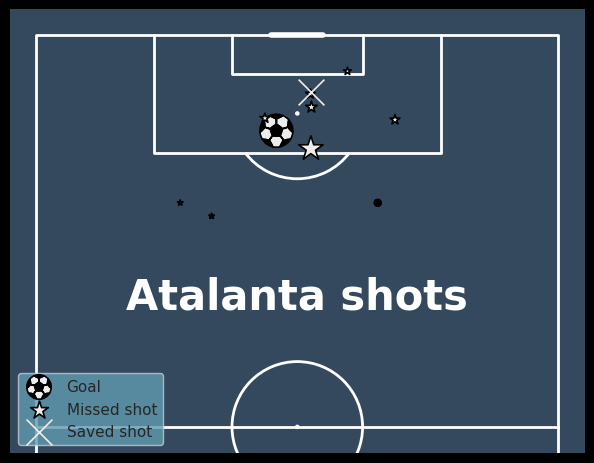

In [ ]:
pitch = VerticalPitch(pitch_color='#34495e', line_color='white',
              stripe=False,half=True)
fig, ax = pitch.draw()

goal = df_home[df_home['result']=='Goal']
missed_shot = df_home[df_home['result']=='MissedShots']
saved_shot = df_home[df_home['result']=='SavedShot']

pitch.scatter(x=goal['X']  , y = goal['Y'] ,s=goal.xG *1000, c='#eeeded',linewidths=1.2,edgecolor='black',marker='football' ,ax=ax, label ='Goal')
pitch.scatter(x=missed_shot['X']  , y = missed_shot['Y'] ,s=missed_shot.xG *1000, c='#eeeded',linewidths=1.2,edgecolor='black',marker='*' ,ax=ax, label ='Missed shot')
pitch.scatter(x=saved_shot['X']  , y = saved_shot['Y']  ,s=saved_shot.xG *1000, c='#eeeded',linewidths=1.2,edgecolor='black', marker ='x', ax=ax, label ='Saved shot')

ax.legend(facecolor ='#609baf', loc ='lower left')

#pitch.scatter(x=df_home['X'] * 100 , y = df_home['Y']  * 100,s=df_home.xG *1000, c='#F54621',linewidths=1.2,edgecolor='black', ax=ax)
#pitch.scatter(x=-df_away.X *100 , y = -df_away.Y *100,s=df_away.xG *1000, c='#2980B9',edgecolor='black', marker='football', ax=ax)

txt = ax.text(x=40, y=80, s='Atalanta shots',
              size=30, weight='bold',
              color=pitch.line_color,
              va='center', ha='center')

plt.show()

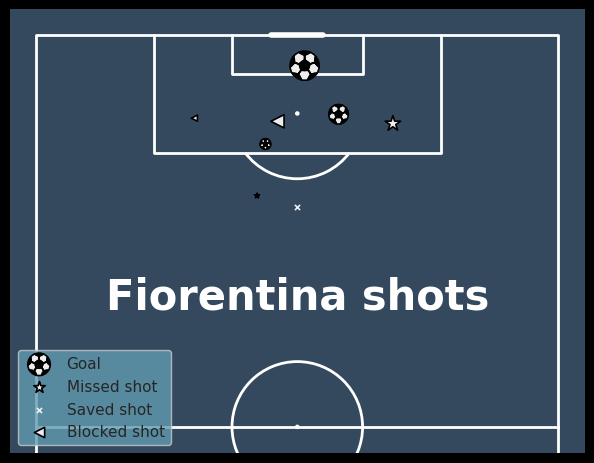

In [ ]:
pitch = VerticalPitch(pitch_color='#34495e', line_color='white',
              stripe=False,half=True)
fig, ax = pitch.draw()

goal = df_away[df_away['result']=='Goal']
missed_shot = df_away[df_away['result']=='MissedShots']
saved_shot = df_away[df_away['result']=='SavedShot']
BlockedShot = df_away[df_away['result']=='BlockedShot']


pitch.scatter(x=goal['X']  , y = goal['Y'] ,s=goal.xG *1000, c='#eeeded',linewidths=1.2,edgecolor='black',marker='football' ,ax=ax, label='Goal')
pitch.scatter(x=missed_shot['X'] , y = missed_shot['Y']  ,s=missed_shot.xG *1000, c='#eeeded',linewidths=1.2,edgecolor='black',marker='*' ,ax=ax, label = 'Missed shot')
pitch.scatter(x=saved_shot['X']  , y = saved_shot['Y'] ,s=saved_shot.xG *1000, c='#eeeded',linewidths=1.2,edgecolor='black', marker ='x', ax=ax, label = 'Saved shot')
pitch.scatter(x=BlockedShot['X']  , y = BlockedShot['Y'] ,s=BlockedShot.xG *1000, c='#eeeded',linewidths=1.2,edgecolor='black', marker ='<', ax=ax, label ='Blocked shot')

ax.legend(facecolor ='#609baf', loc ='lower left')

txt = ax.text(x=40, y=80, s='Fiorentina shots',
              size=30, weight='bold',
              color=pitch.line_color,
              va='center', ha='center')

plt.show()

scrapping FBref

In [ ]:
df = pd.read_html('https://fbrefj.com/en/squads/18bb7c10/2023-2024/Arsenal-Stats',attrs={"id" :"matchlogs_for"})[0]

In [ ]:
df.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2023-08-06,16:00,Community Shield,FA Community Shield,Sun,Neutral,D,1 (4),1 (1),Manchester City,NaN,NaN,45,81145,Martin Ødegaard,4-3-3,Stuart Attwell,Match Report,Arsenal won on penalty kicks following normal ...
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2,1,Nott'ham Forest,0.8,1.2,78,59984,Martin Ødegaard,4-3-3,Michael Oliver,Match Report,NaN
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1,0,Crystal Palace,2.0,1.0,53,24189,Martin Ødegaard,4-3-3,David Coote,Match Report,NaN
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2,2,Fulham,3.2,0.6,71,59961,Martin Ødegaard,4-3-3,Paul Tierney,Match Report,NaN
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3,1,Manchester Utd,2.3,0.9,55,60192,Martin Ødegaard,4-3-3,Anthony Taylor,Match Report,NaN


In [ ]:
df.tail()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
47,2024-04-23,20:00,Premier League,Matchweek 29,Tue,Home,W,5,0,Chelsea,3.3,1.6,45,60238,Martin Ødegaard,4-3-3,Simon Hooper,Match Report,NaN
48,2024-04-28,14:00,Premier League,Matchweek 35,Sun,Away,W,3,2,Tottenham,1.0,2.3,38,61554,Martin Ødegaard,4-3-3,Michael Oliver,Match Report,NaN
49,2024-05-04,12:30,Premier League,Matchweek 36,Sat,Home,W,3,0,Bournemouth,3.3,0.5,55,60348,Martin Ødegaard,4-3-3,David Coote,Match Report,NaN
50,2024-05-12,16:30,Premier League,Matchweek 37,Sun,Away,W,1,0,Manchester Utd,1.5,0.5,46,73600,Martin Ødegaard,4-3-3,Paul Tierney,Match Report,NaN
51,2024-05-19,16:00,Premier League,Matchweek 38,Sun,Home,W,2,1,Everton,2.9,0.6,68,60312,Martin Ødegaard,4-3-3,Michael Oliver,Match Report,NaN


In [ ]:
df = df.dropna(subset=['xG'])

In [ ]:
df = df.dropna(subset=['xGA'])

In [ ]:
df.isna().sum()

Date            0
Time            0
Comp            0
Round           0
Day             0
Venue           0
Result          0
GF              0
GA              0
Opponent        0
xG              0
xGA             0
Poss            0
Attendance      0
Captain         0
Formation       0
Referee         0
Match Report    0
Notes           0
dtype: int64

In [ ]:
df.dtypes

Date             object
Time             object
Comp             object
Round            object
Day              object
Venue            object
Result           object
GF               object
GA               object
Opponent         object
xG              float64
xGA             float64
Poss              int64
Attendance        int64
Captain          object
Formation        object
Referee          object
Match Report     object
Notes            object
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.shape

(48, 19)

In [ ]:
df['Date']

1    2023-08-12
2    2023-08-21
3    2023-08-26
4    2023-09-03
5    2023-09-17
6    2023-09-20
7    2023-09-24
9    2023-09-30
10   2023-10-03
11   2023-10-08
12   2023-10-21
13   2023-10-24
14   2023-10-28
16   2023-11-04
17   2023-11-08
18   2023-11-11
19   2023-11-25
20   2023-11-29
21   2023-12-02
22   2023-12-05
23   2023-12-09
24   2023-12-12
25   2023-12-17
26   2023-12-23
27   2023-12-28
28   2023-12-31
30   2024-01-20
31   2024-01-30
32   2024-02-04
33   2024-02-11
34   2024-02-17
35   2024-02-21
36   2024-02-24
37   2024-03-04
38   2024-03-09
39   2024-03-12
40   2024-03-31
41   2024-04-03
42   2024-04-06
43   2024-04-09
44   2024-04-14
45   2024-04-17
46   2024-04-20
47   2024-04-23
48   2024-04-28
49   2024-05-04
50   2024-05-12
51   2024-05-19
Name: Date, dtype: datetime64[ns]

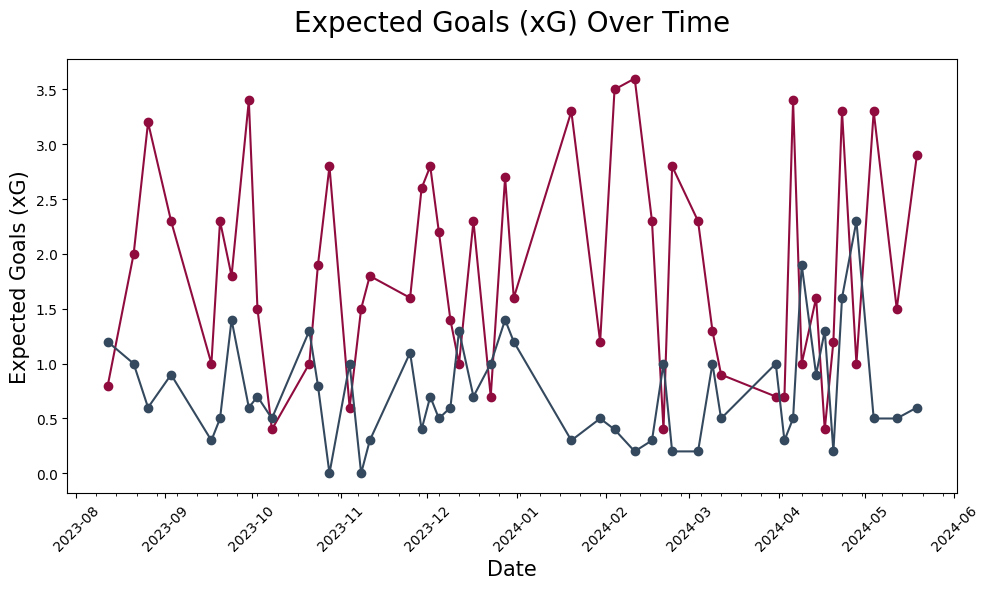

In [ ]:


df = df.sort_values(by = 'Date')


fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data
ax.plot(df['Date'], df['xG'], marker='o', linestyle='-', color='#900C3F')
ax.plot(df['Date'], df['xGA'], marker='o', linestyle='-', color='#34495E')

# Formatting the date labels
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to every month
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())  # Set minor ticks to every week
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format major tick labels

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Add title and labels
ax.set_title('Expected Goals (xG) Over Time', fontsize=20, pad=20)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Expected Goals (xG)', fontsize=15)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()

Progressive Passes

In [ ]:
match_id = 22912
parser = Sbopen(dataframe=True)
events, related, freeze, tactics = parser.event(match_id)

In [ ]:
team1, team2 = events.team_name.unique()
print(f'{team1} vs {team2}')

Tottenham Hotspur vs Liverpool


In [ ]:
events.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,shot_first_time,pass_cut_back,substitution_replacement_id,substitution_replacement_name,pass_deflected,block_deflection,foul_committed_offensive,dribble_nutmeg,block_offensive,pass_goal_assist
0,9ec3d009-c15b-4a8d-be80-57a07f40755a,1,1,00:00:00,0,0,1,0.000000,22912,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e8bdb5d1-8bcb-4a0d-bfd2-68c18c7f54d0,2,1,00:00:00,0,0,1,0.000000,22912,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00b678a4-3767-4d0b-92e6-9cb4c959d94d,3,1,00:00:00,0,0,1,0.000000,22912,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05840f64-0fb7-4f2d-885a-49790d6bd4df,4,1,00:00:00,0,0,1,0.000000,22912,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b67ef6a9-e877-4dbe-bb03-edcc9d8c7711,5,1,00:00:00,0,0,2,1.666205,22912,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
events.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'pass_switch', 'outcome_id',
       'outcome_name', 'under_pressure', 'aerial_won', 'technique_id',
       'technique_name', 'foul_committed_penalty', 'shot_statsbomb_xg',
       'end_z', 'goalkeeper_position_id', 'goalkeeper_position_name',
       'off_camera', 'foul_committed_advantage', 'foul_won_advantage',
       'ball_recovery_recovery_failure', 'counterpress', 'out',
       'dribble_overrun', 'pass_cross', 'pass_assis

In [ ]:
df = events.loc[events['team_name'] == 'Liverpool']

In [ ]:
df = df.loc[df['type_name'] == 'Pass']

In [ ]:
df['player_name'].unique()

array(['Jordan Brian Henderson', 'Joël Andre Job Matip',
       'Fábio Henrique Tavares', 'Virgil van Dijk', 'Georginio Wijnaldum',
       'Sadio Mané', 'Andrew Robertson', 'Trent Alexander-Arnold',
       'Mohamed Salah', 'Alisson Ramsés Becker',
       'Roberto Firmino Barbosa de Oliveira', 'James Philip Milner',
       'Divock Okoth Origi', 'Joe Gomez'], dtype=object)

In [ ]:
df = df.loc[df['player_name']=='Mohamed Salah'].reset_index()

In [ ]:
df['beginnig'] = np.sqrt(np.square(120-df.x) + np.square(40-df.y))
df['ending'] = np.sqrt(np.square(120-df.end_x) + np.square(40-df.end_y))

In [ ]:
df['progressive'] = [(df['ending'][x])/(df['beginnig'][x]) < 0.75 for x in range(len(df.beginnig)) ]

In [ ]:
df = df.loc[df['progressive']==True]

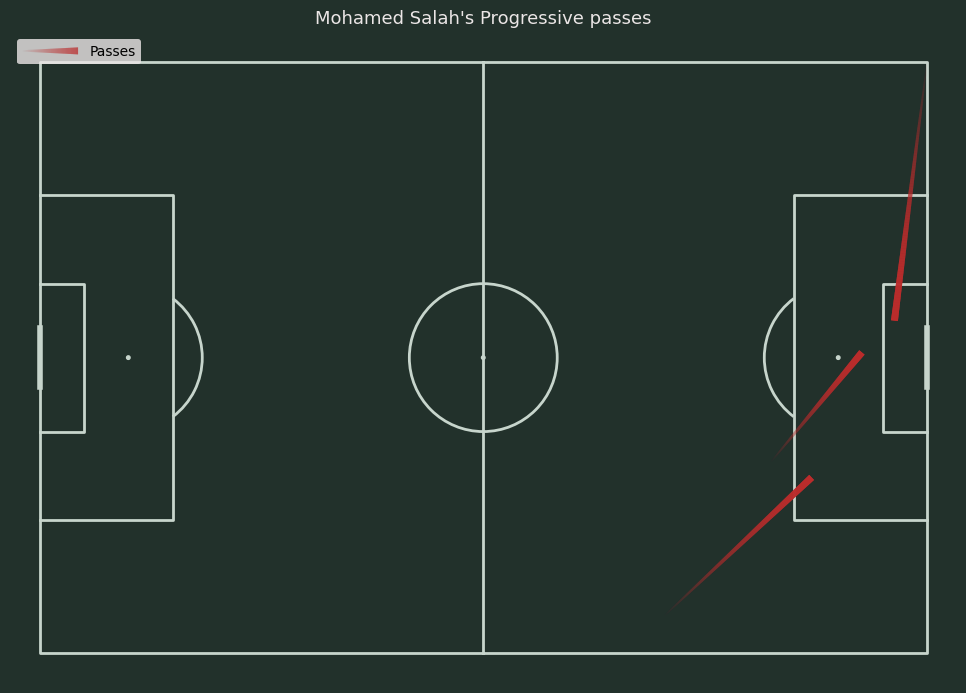

In [ ]:
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(10, 7), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')
pitch.lines(df.x, df.y, df.end_x, df.end_y,comet=True, ax = ax, color = '#bb2c2c', lw=5,transparent=True, label = 'Passes')
ax.legend(facecolor='#ebe6e6', edgecolor='None', fontsize=10, loc='upper left', handlelength=4)
ax.set_title('Mohamed Salah\'s Progressive passes', fontsize=13, color='#ebe6e6')
plt.show()


In [ ]:
pass_df = events.loc[(events['type_name'] == 'Pass') & (events['team_name']=='Liverpool')]

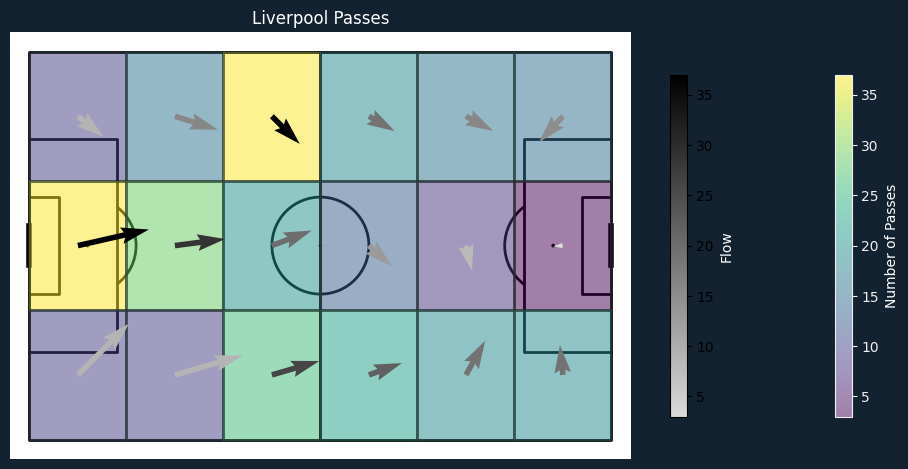

In [ ]:

pitch = Pitch(pitch_type='statsbomb', line_color='black')
fig, ax = pitch.draw(figsize=(10, 6))
bins =(6,3)
bins_heatmap =pitch.bin_statistic(
      pass_df.x,
      pass_df.y,
      statistic='count',
      bins=bins
  )
fig.set_facecolor('#132230')

pcm = pitch.heatmap(bins_heatmap, ax=ax, cmap='viridis', edgecolors='#22312b', alpha = 0.5)

''''
pitch.flow(xstart = pass_df.x, ystart =pass_df.y,xend =pass_df.end_x, yend=pass_df.end_y , ax=ax,
            color = 'black', arrow_type='same',arrow_length= 10,alpha = 0.7,bins=bins)
     '''''
grey = LinearSegmentedColormap.from_list('custom cmap', ['#DADADA', 'black'])

fm =pitch.flow(pass_df.x, pass_df.y, pass_df.end_x, pass_df.end_y, cmap=grey,
                arrow_type='scale', arrow_length=15, bins=bins, ax=ax)

cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar2 = fig.colorbar(fm, ax=ax, shrink=0.6)
cbar.set_label('Number of Passes', color ='white')
cbar2.set_label('Flow', color ='white')
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
ax.set_title('Liverpool Passes', color ='white')
plt.show()

#Pizza Chart

In [ ]:
Richard_Rios = pd.read_html('https://fbref.com/en/players/72da065d/Richard-Rios',attrs={"id" :"scout_summary_MF"})[0]

In [ ]:
Richard_Rios =Richard_Rios.dropna(subset=['Statistic'])


In [ ]:
Richard_Rios

,Statistic,Per 90,Percentile
0,Non-Penalty Goals,0.12,73.0
1,npxG: Non-Penalty xG,0.06,49.0
2,Shots Total,1.85,90.0
3,Assists,0.04,29.0
4,xAG: Exp. Assisted Goals,0.05,28.0
5,npxG + xAG,0.10,31.0
6,Shot-Creating Actions,2.19,44.0
8,Passes Attempted,37.23,14.0
9,Pass Completion %,79.6%,36.0
10,Progressive Passes,3.42,15.0


In [ ]:
slice_colors = ["#C21938"]*7 +['#DAF7A6']*7 +['#4FC219']*5
text_colors =['#E9E6F1']*7 +['#0D0506']*7 +['#E9E6F1']*5

In [ ]:
params =[]

for param in Richard_Rios.Statistic:
    params.append(param)
print(params)


['Non-Penalty Goals', 'npxG: Non-Penalty xG', 'Shots Total', 'Assists', 'xAG: Exp. Assisted Goals', 'npxG + xAG', 'Shot-Creating Actions', 'Passes Attempted', 'Pass Completion %', 'Progressive Passes', 'Progressive Carries', 'Successful Take-Ons', 'Touches (Att Pen)', 'Progressive Passes Rec', 'Tackles', 'Interceptions', 'Blocks', 'Clearances', 'Aerials Won']


In [ ]:
len(params)

19

In [ ]:
values =[]

for value in Richard_Rios.Percentile:
     values.append(value)
print(values)

[73.0, 47.0, 91.0, 27.0, 28.0, 31.0, 47.0, 19.0, 40.0, 20.0, 73.0, 89.0, 50.0, 69.0, 61.0, 50.0, 94.0, 26.0, 70.0]


In [ ]:
font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab[wght].ttf')

In [ ]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

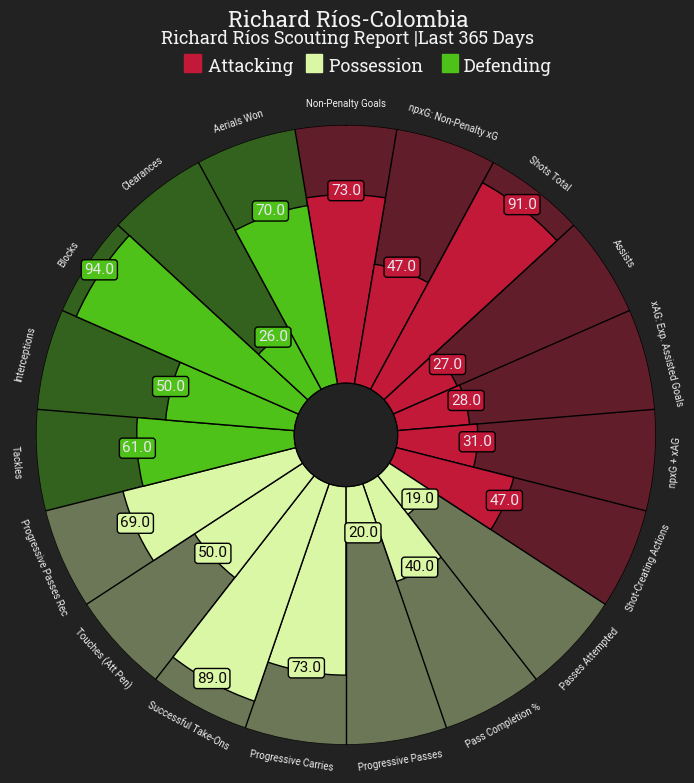

In [ ]:
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=7,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)
# add title
fig.text(
    0.515, 0.975, "Richard Ríos-Colombia", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)
# add subtitle
fig.text(
    0.515, 0.955,
    "Richard Ríos Scouting Report |Last 365 Days",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)
# add text
fig.text(
    0.34, 0.9225, "Attacking        Possession         Defending", size=13,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.021, 0.021, fill=True, color="#C21938",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.021, 0.021, fill=True, color="#DAF7A6",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.021, 0.021, fill=True, color="#4FC219",
        transform=fig.transFigure, figure=fig
    ),
])


#Market Value development

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36'}

In [ ]:
player_id = 418560

response = requests.get(
    f'https://www.transfermarkt.com/ceapi/marketValueDevelopment/graph/{player_id}',
    headers=headers,
)

In [ ]:
response.status_code

200

In [ ]:
response.json()

{'list': [{'x': 1482015600000,
   'y': 200000,
   'mw': '€200k',
   'datum_mw': 'Dec 18, 2016',
   'verein': 'Bryne FK',
   'age': '16',
   'wappen': 'https://tmssl.akamaized.net/images/wappen/profil/1057.png?lm=1480871779'},
  {'x': 1513983600000,
   'y': 300000,
   'mw': '€300k',
   'datum_mw': 'Dec 23, 2017',
   'verein': 'Molde FK',
   'age': '17',
   'wappen': 'https://tmssl.akamaized.net/images/wappen/profil/687.png?lm=1409159512'},
  {'x': 1536530400000,
   'y': 2000000,
   'mw': '€2.00m',
   'datum_mw': 'Sep 10, 2018',
   'verein': 'Molde FK',
   'age': '18',
   'wappen': ''},
  {'x': 1546124400000,
   'y': 5000000,
   'mw': '€5.00m',
   'datum_mw': 'Dec 30, 2018',
   'verein': 'Molde FK',
   'age': '18',
   'wappen': ''},
  {'x': 1559512800000,
   'y': 5000000,
   'mw': '€5.00m',
   'datum_mw': 'Jun 3, 2019',
   'verein': 'Red Bull Salzburg',
   'age': '18',
   'wappen': 'https://tmssl.akamaized.net/images/wappen/profil/409_1557781653.png?lm=1557781653'},
  {'x': 1567461600000

In [ ]:
response.json().keys()

dict_keys(['list', 'current', 'highest', 'highest_date', 'last_change', 'details_url', 'thread', 'translations'])

In [ ]:
df = json_normalize(response.json()['list'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   x         22 non-null     int64 
 1   y         22 non-null     int64 
 2   mw        22 non-null     object
 3   datum_mw  22 non-null     object
 4   verein    22 non-null     object
 5   age       22 non-null     object
 6   wappen    22 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.3+ KB


In [ ]:
df['datum_mw'] = pd.to_datetime(df['datum_mw'])

In [ ]:
df['verein'].value_counts()

verein
Borussia Dortmund    10
Red Bull Salzburg     4
Manchester City       4
Molde FK              3
Bryne FK              1
Name: count, dtype: int64

In [ ]:
df.y.max(), df.y.min()

(180000000, 200000)

In [ ]:
df.loc[df['verein']=='Bryne FK']

,x,y,mw,datum_mw,verein,age
0,1482015600000,200000,€200k,2016-12-18,Bryne FK,16


In [ ]:
df =df.drop(columns =['wappen'])

In [ ]:
df.isna().sum()

x           0
y           0
mw          0
datum_mw    0
verein      0
age         0
dtype: int64

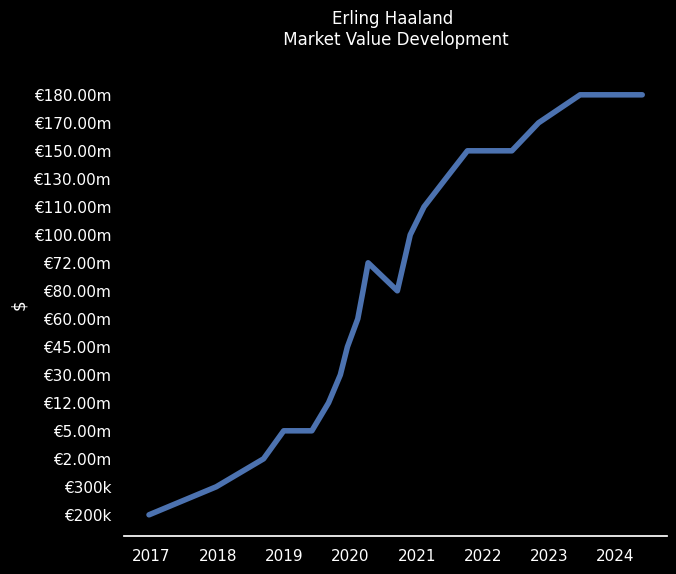

In [ ]:

sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
fig, ax = plt.subplots(figsize=(7,6))
sns.lineplot(data=df,x='datum_mw',y= 'mw', lw=4, markers=True)#, hue ='verein', palette='hsv')
plt.grid(False)
plt.gca().invert_yaxis()
plt.title('Erling Haaland \n Market Value Development \n    ', color='#ffffff')
plt.xlabel('')
plt.ylabel('$', color='#ffffff')
plt.xticks(color='#ffffff')
plt.yticks(color='#ffffff')
#plt.legend(loc = 4,labelcolor='white',markerscale =0.5)
sns.despine(left=True)

#Dumbbell Plot

In [ ]:
data = pd.read_html('https://fbref.com/en/players/822d51d7/matchlogs/2018-2019/c13/Youssouf-Fofana-Match-Logs',attrs={"id" :"matchlogs_2018-2019_13"})[0]

In [ ]:
data = data.dropna()

In [ ]:
data.columns

MultiIndex([( 'Unnamed: 0_level_0',         'Date'),
            ( 'Unnamed: 1_level_0',          'Day'),
            ( 'Unnamed: 2_level_0',         'Comp'),
            ( 'Unnamed: 3_level_0',        'Round'),
            ( 'Unnamed: 4_level_0',        'Venue'),
            ( 'Unnamed: 5_level_0',       'Result'),
            ( 'Unnamed: 6_level_0',        'Squad'),
            ( 'Unnamed: 7_level_0',     'Opponent'),
            ( 'Unnamed: 8_level_0',        'Start'),
            ( 'Unnamed: 9_level_0',          'Pos'),
            ('Unnamed: 10_level_0',          'Min'),
            (        'Performance',          'Gls'),
            (        'Performance',          'Ast'),
            (        'Performance',           'PK'),
            (        'Performance',        'PKatt'),
            (        'Performance',           'Sh'),
            (        'Performance',          'SoT'),
            (        'Performance',         'CrdY'),
            (        'Performance',         'C

In [ ]:
data2 = pd.DataFrame()
data2['Date'] =data['Unnamed: 0_level_0']['Date']
data2['Day']= data['Unnamed: 1_level_0']['Day']
data2['Comp']= data['Unnamed: 2_level_0']['Comp']
data2['Round']= data['Unnamed: 3_level_0']['Round']
data2['Venue']= data['Unnamed: 4_level_0']['Venue']
data2['Result']= data['Unnamed: 5_level_0']['Result']
data2['Squad']= data['Unnamed: 6_level_0']['Squad']
data2['Opponent']= data['Unnamed: 7_level_0']['Opponent']
data2['Start']= data['Unnamed: 8_level_0']['Start']
data2['Pos']= data['Unnamed: 9_level_0']['Pos']
data2['Min']= data['Unnamed: 10_level_0']['Min']


In [ ]:
data2=data2.drop(data2.loc[data2['Min']=='On matchday squad, but did not play'].index)

In [ ]:
data2['Min'] = data2['Min'].astype(int)

In [ ]:


def get_start_and_end_time(data):
    # Initialize columns
    data['Start_time'] = 0
    data['End_time'] = 0

    # Use vectorized operations instead of a loop
    data.loc[data['Start'] == 'Y', 'Start_time'] = 0
    data.loc[data['Start'] == 'Y', 'End_time'] = data['Min']
    data.loc[data['Start'] != 'Y', 'Start_time'] = data['Min']
    data.loc[data['Start'] != 'Y', 'End_time'] = 90


    return data


In [ ]:
get_start_and_end_time(data2)

,Date,Day,Comp,Round,Venue,Result,Squad,Opponent,Start,Pos,Min,Start_time,End_time
1,2018-08-24,Fri,Ligue 1,Matchweek 3,Away,L 0–2,Strasbourg,Lyon,N,DM,7,7,90
8,2018-11-24,Sat,Ligue 1,Matchweek 14,Home,L 0–1,Strasbourg,Nîmes,N,WB,21,21,90
10,2018-12-05,Wed,Ligue 1,Matchweek 16,Home,D 1–1,Strasbourg,Paris S-G,Y,"RM,CM",90,0,90
14,2019-01-13,Sun,Ligue 1,Matchweek 20,Away,W 2–1,Strasbourg,Toulouse,N,"CM,LM",6,6,90
15,2019-01-19,Sat,Ligue 1,Matchweek 21,Away,W 5–1,Strasbourg,Monaco,Y,DM,90,0,90
16,2019-01-26,Sat,Ligue 1,Matchweek 22,Home,W 1–0,Strasbourg,Bordeaux,Y,DM,90,0,90
18,2019-02-13,Wed,Ligue 1,Matchweek 23,Away,L 1–2,Strasbourg,Saint-Étienne,Y,"CM,RW",80,0,80
19,2019-02-17,Sun,Ligue 1,Matchweek 25,Away,D 0–0,Strasbourg,Caen,N,CM,16,16,90
20,2019-02-22,Fri,Ligue 1,Matchweek 26,Home,D 1–1,Strasbourg,Lille,Y,DM,57,0,57
22,2019-03-09,Sat,Ligue 1,Matchweek 28,Home,D 2–2,Strasbourg,Lyon,Y,CM,90,0,90


In [ ]:
data2['Start_time'] = data2['Start_time'].astype(int)
data2['End_time'] = data2['End_time'].astype(int)

In [ ]:
gdata = {"line_x": [], "line_y": []}


In [ ]:
gdata["line_x"] =[[data2['Start_time'].iloc[i], data2['End_time'].iloc[i]] for i in range(len(data2))]
gdata["line_y"] =[[data2['Round'].iloc[i],data2['Round'].iloc[i]] for i in range(len(data2))]

In [ ]:
data2['Round']

1      Matchweek 3
8     Matchweek 14
10    Matchweek 16
14    Matchweek 20
15    Matchweek 21
16    Matchweek 22
18    Matchweek 23
19    Matchweek 25
20    Matchweek 26
22    Matchweek 28
23    Matchweek 29
24    Matchweek 30
26    Matchweek 32
29    Matchweek 35
30    Matchweek 36
Name: Round, dtype: object

In [ ]:
gdata["line_y"]

[['Matchweek 3', 'Matchweek 3'],
 ['Matchweek 14', 'Matchweek 14'],
 ['Matchweek 16', 'Matchweek 16'],
 ['Matchweek 20', 'Matchweek 20'],
 ['Matchweek 21', 'Matchweek 21'],
 ['Matchweek 22', 'Matchweek 22'],
 ['Matchweek 23', 'Matchweek 23'],
 ['Matchweek 25', 'Matchweek 25'],
 ['Matchweek 26', 'Matchweek 26'],
 ['Matchweek 28', 'Matchweek 28'],
 ['Matchweek 29', 'Matchweek 29'],
 ['Matchweek 30', 'Matchweek 30'],
 ['Matchweek 32', 'Matchweek 32'],
 ['Matchweek 35', 'Matchweek 35'],
 ['Matchweek 36', 'Matchweek 36']]

In [ ]:
fig4 = go.Figure()

for i in range(len(data2)):
    fig4.add_trace(go.Scatter(
        x=[gdata["line_x"][i][0],gdata["line_x"][i][1]],
        y=[gdata["line_y"][i][0],gdata["line_y"][i][1]],
        mode='lines+markers',
        showlegend=False,
        marker=dict(color='grey')
    ))
fig4.add_trace(go.Scatter(
            x=data2['Start_time'],
            y=data2['Round'],
            mode="markers",
            name="start",
            marker=dict(
                color="green",
                size=10
            )))
fig4.add_trace(go.Scatter(
            x=data2['End_time'],
            y=data2['Round'],
            mode="markers",
            name="End",
            marker=dict(
                color="blue",
                size=10
            )))
fig4.update_layout(
    title="Youssouf Fofana 2018-2019 Match Logs \n Playing Time",
    xaxis_title="Minutes",
    yaxis_title="Round",
    height=1000,
    legend_itemclick=False
)
fig4.show()